In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-screen-time/Screentime - App Details.csv
/kaggle/input/analyzing-screen-time/Screentime - App Ranking.csv
/kaggle/input/analyzing-screen-time/Screentime - Overall Usage.csv


In [2]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_details = pd.read_csv("/kaggle/input/analyzing-screen-time/Screentime - App Details.csv")
df_details.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [4]:
df_rankings = pd.read_csv("/kaggle/input/analyzing-screen-time/Screentime - App Ranking.csv")
df_rankings.head()

,Date,Rank 1,Rank 2,Rank 3
0,08/26/2022,Whatsapp,Instagram,Netflix
1,08/27/2022,Whatsapp,Instagram,Chrome
2,08/28/2022,Whatsapp,Instagram,WeChat
3,08/29/2022,Whatsapp,Chrome,WeChat
4,08/30/2022,Whatsapp,LinkedIn,Chrome


In [5]:
df_overall = pd.read_csv("/kaggle/input/analyzing-screen-time/Screentime - Overall Usage.csv")
df_overall.head()

,Date,Total Usage,Notifications,Unlocks
0,08/26/2022,236,600,102
1,08/27/2022,194,411,96
2,08/28/2022,301,709,114
3,08/29/2022,190,542,119
4,08/30/2022,204,583,85


In [6]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    return df

In [7]:
files = glob("/kaggle/input/analyzing-screen-time/Screentime - *.csv")

In [8]:
frames = []
for file in files:
    df = wrangle(file)
    frames.append(df)
    

In [9]:
df = pd.concat(frames, ignore_index = True)
df.head()

,Date,Usage,Notifications,Times opened,App,Date,Rank 1,Rank 2,Rank 3,Total Usage,Unlocks
0,08/26/2022,38.0,70.0,49.0,Instagram,NaN,NaN,NaN,NaN,NaN,NaN
1,08/27/2022,39.0,43.0,48.0,Instagram,NaN,NaN,NaN,NaN,NaN,NaN
2,08/28/2022,64.0,231.0,55.0,Instagram,NaN,NaN,NaN,NaN,NaN,NaN
3,08/29/2022,14.0,35.0,23.0,Instagram,NaN,NaN,NaN,NaN,NaN,NaN
4,08/30/2022,3.0,19.0,5.0,Instagram,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum() / len(df)

Date             0.50
Usage            0.50
Notifications    0.25
Times opened     0.50
App              0.50
Date             0.50
Rank 1           0.75
Rank 2           0.75
Rank 3           0.75
Total Usage      0.75
Unlocks          0.75
dtype: float64

**Over all Usage**
*Check if there is any corelation b/w number of notifications and the number of times the user opens an app*
*Does usage have a correlation with the number of notifications?*

In [11]:
df_overall.head()

,Date,Total Usage,Notifications,Unlocks
0,08/26/2022,236,600,102
1,08/27/2022,194,411,96
2,08/28/2022,301,709,114
3,08/29/2022,190,542,119
4,08/30/2022,204,583,85


In [12]:
df_overall.isnull().sum() /len(df_overall)

Date             0.0
Total Usage      0.0
Notifications    0.0
Unlocks          0.0
dtype: float64

In [13]:
df_overall.nunique()

Date             27
Total Usage      27
Notifications    27
Unlocks          26
dtype: int64

In [14]:
corr_not_with_usage = df_overall["Notifications"].corr(df_overall["Total Usage"])
corr_not_with_usage

0.7573417266521896

In [15]:
corr_not_with_unlocks = df_overall["Notifications"].corr(df_overall["Unlocks"])

In [16]:
print("The corelation b/w notification & usage is ", corr_not_with_usage)
print("The corelation b/w notification & unlocking of app is ", corr_not_with_unlocks)

The corelation b/w notification & usage is  0.7573417266521896
The corelation b/w notification & unlocking of app is  0.5739835762444749


In [17]:
import plotly.express as px
figure = px.bar(x=df_overall["Notifications"], y = df_overall["Total Usage"])
figure.show()

In [18]:
#plt.bar(x=df_overall["Notifications"], y = df_overall["Total Usage"])

In [19]:
most_unlocks = df_overall['Unlocks'].max()
print(most_unlocks)

corelated_notifications = df_overall.loc[df_overall['Unlocks'] == most_unlocks, 'Notifications'].iloc[0]
print('No. of times user got notification = ', corelated_notifications, ' Max number of unlocks to their phone =', most_unlocks)

163
No. of times user got notification =  844  Max number of unlocks to their phone = 163


In [20]:
df['Date ']= df['Date '].astype("datetime64")

Text(0.5, 0, 'Values')

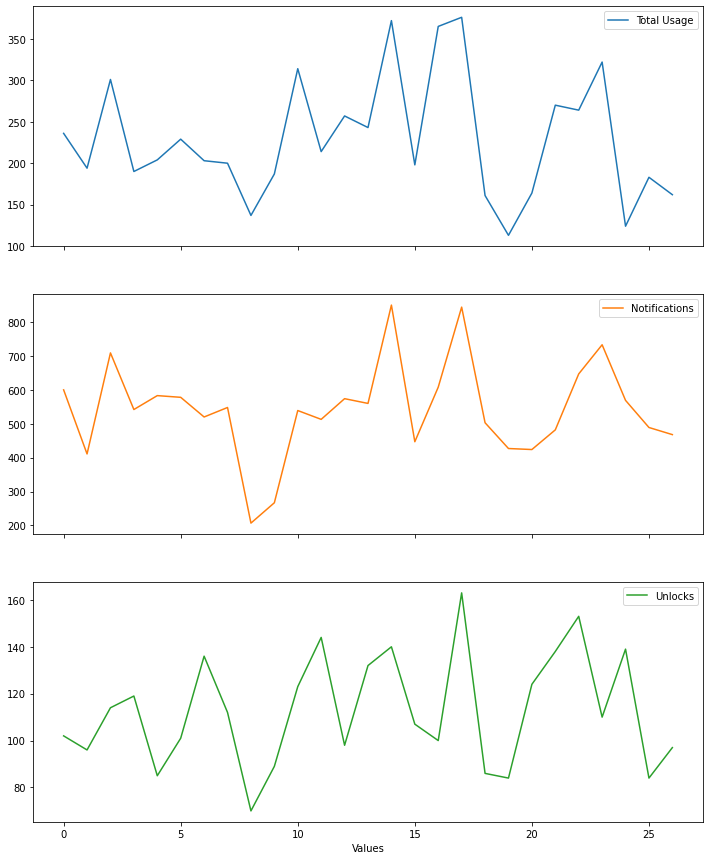

In [21]:
df_overall.plot(subplots=True, figsize=(12, 15))
plt.xlabel('Values')

In [22]:
sorted_df_overall = df_overall.sort_values(by=['Total Usage'], ascending = False)
sorted_df_overall.head()

,Date,Total Usage,Notifications,Unlocks
17,09/12/2022,376,844,163
14,09/09/2022,372,850,140
16,09/11/2022,365,608,100
23,09/18/2022,322,733,110
10,09/05/2022,314,539,123


Text(0.5, 1.0, 'Total Usage per Day')

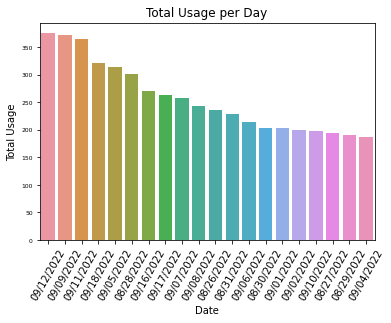

In [23]:
sns.barplot(x='Date ',y='Total Usage', data = sorted_df_overall.head(20))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.yticks(fontsize= 6)
plt.ylabel('Total Usage')
plt.xlabel('Date')
plt.xticks(rotation = 60)
plt.title('Total Usage per Day')

**App Details**